<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn



### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [4]:
print(df.dtypes)
print(df.columns)
print(df.describe)

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)
<bound method NDFrame.describe of        ResponseId                      MainBranch                 Age  \
0               1  I am a developer by profession  Under 18 years old   
1               2  I am a developer by profession     35-44 yea

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [8]:
df.isnull().sum()

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [19]:
df = df.dropna(subset=['JobSat'])
df = df.dropna(subset=['Employment'])
df = df.dropna(subset=['YearsCodePro'])

value_counts = df['Employment'].value_counts()
unique_values = value_counts[value_counts <30].index
df = df[~df['Employment'].isin(unique_values)]

In [20]:
print(df['JobSat'].value_counts())
print(df['Employment'].value_counts())
print(df['YearsCodePro'].value_counts())

JobSat
8.0     7295
7.0     6217
6.0     3636
9.0     3540
10.0    2174
5.0     1846
3.0     1130
4.0     1086
2.0      730
0.0      281
1.0      253
Name: count, dtype: int64
Employment
Employed, full-time                                                                             21903
Employed, full-time;Independent contractor, freelancer, or self-employed                         2231
Independent contractor, freelancer, or self-employed                                             1242
Employed, part-time                                                                               531
Employed, full-time;Student, part-time                                                            488
Student, full-time;Employed, part-time                                                            407
Employed, full-time;Student, full-time                                                            382
Student, part-time;Employed, part-time                                                            2

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


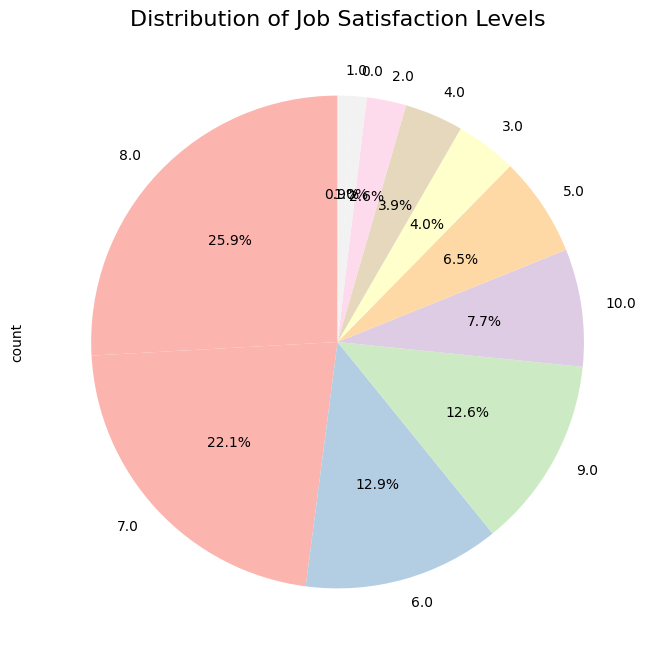

In [21]:

job_sat_counts = df['JobSat'].value_counts()

plt.figure(figsize=(8, 8))
job_sat_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Pastel1')

plt.title('Distribution of Job Satisfaction Levels', fontsize=16)

plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [22]:
df['LanguageHaveWorkedWith'].value_counts()

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                                                                520
Python                                                                                                        285
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                                         262
HTML/CSS;JavaScript;PHP;SQL                                                                                   224
C#;HTML/CSS;JavaScript;SQL                                                                                    215
                                                                                                             ... 
Bash/Shell (all shells);Go;HTML/CSS;JavaScript;PHP;Scala;Zig                                                    1
Ada;HTML/CSS;JavaScript;PHP                                                                                     1
Assembly;Bash/Shell (all shells);C;C++;Groovy;Lisp;OCaml;Perl;Pyt

In [23]:
from collections import Counter
import pandas as pd

# Step 1: Count frequencies in 'LanguageHaveWorkedWith'
have_worked_counts = Counter(
    [lang.strip() for langs in df['LanguageHaveWorkedWith'].dropna() for lang in langs.split(';')]
)

# Step 2: Count frequencies in 'LanguageWantToWorkWith'
want_to_work_counts = Counter(
    [lang.strip() for langs in df['LanguageWantToWorkWith'].dropna() for lang in langs.split(';')]
)

# Step 3: Convert to DataFrames for easier comparison
have_worked_df = pd.DataFrame.from_dict(have_worked_counts, orient='index', columns=['HaveWorked']).sort_values(by='HaveWorked', ascending=False)
want_to_work_df = pd.DataFrame.from_dict(want_to_work_counts, orient='index', columns=['WantToWork']).sort_values(by='WantToWork', ascending=False)

# Step 4: Merge the two DataFrames
comparison_df = pd.concat([have_worked_df, want_to_work_df], axis=1).fillna(0)

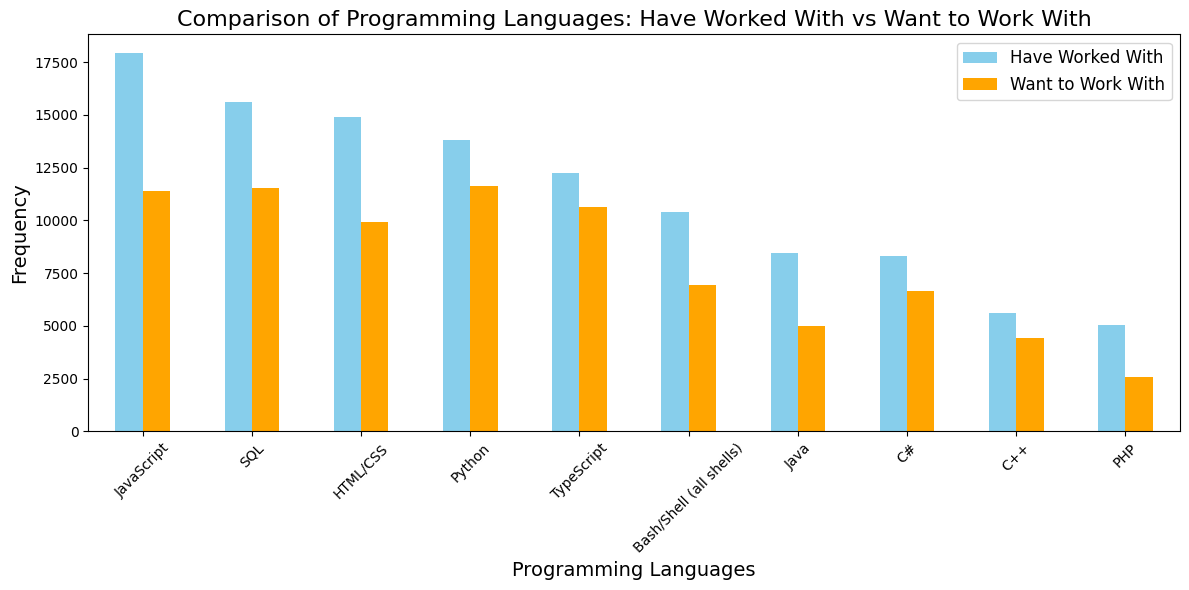

In [27]:
top_languages = comparison_df.nlargest(10, 'HaveWorked')

# Plot the grouped bar chart
top_languages.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'orange'])
plt.title('Comparison of Programming Languages: Have Worked With vs Want to Work With', fontsize=16)
plt.xlabel('Programming Languages', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.legend(['Have Worked With', 'Want to Work With'], fontsize=12)
plt.tight_layout()
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


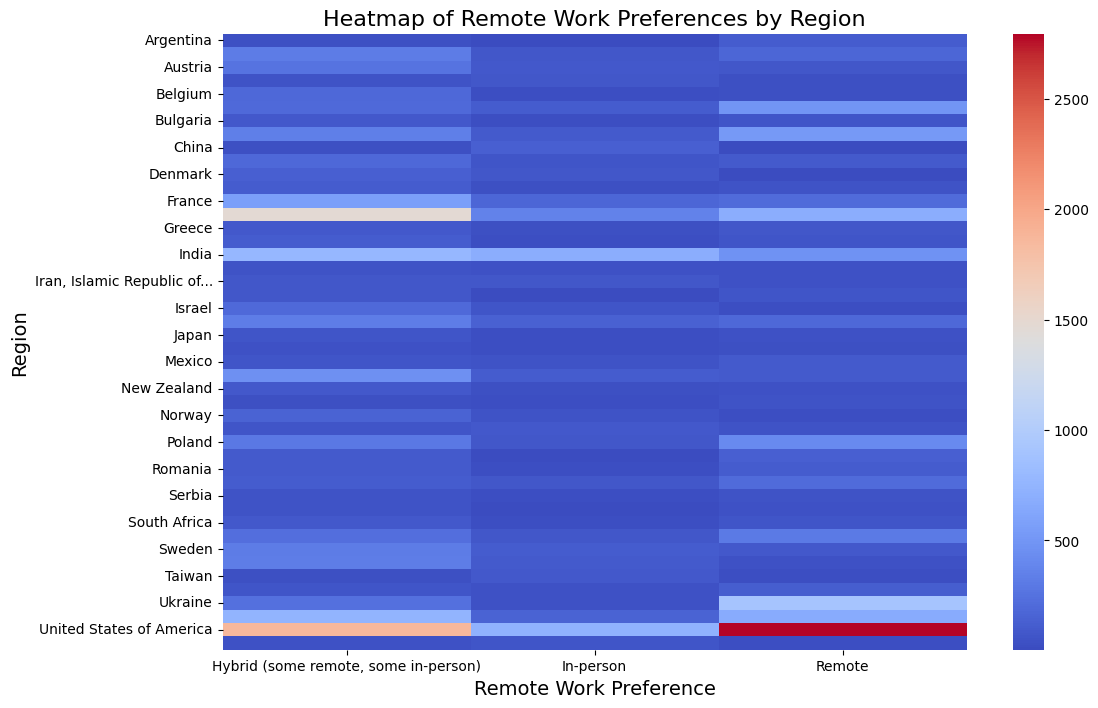

In [32]:

country_counts = df['Country'].value_counts()
valid_countries = country_counts[country_counts > 100].index
filtered_df = df[df['Country'].isin(valid_countries)]

remote_work_by_region = pd.crosstab(filtered_df['Country'], filtered_df['RemoteWork'])
plt.figure(figsize=(12, 8))
sns.heatmap(remote_work_by_region, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Remote Work Preferences by Region', fontsize=16)
plt.xlabel('Remote Work Preference', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [34]:
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 170.0 MB/s eta 0:00:0000:01


In [35]:
from scipy.stats import pearsonr, spearmanr

# Step 1: Convert non-numeric values to numeric in YearsCodePro
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}).astype(float)

# Step 2: Remove rows with NaN in JobSat or YearsCodePro
cleaned_df = df.dropna(subset=['JobSat', 'YearsCodePro'])

# Step 3: Calculate Pearson and Spearman correlation coefficients
pearson_corr, pearson_pval = pearsonr(cleaned_df['JobSat'], cleaned_df['YearsCodePro'])
spearman_corr, spearman_pval = spearmanr(cleaned_df['JobSat'], cleaned_df['YearsCodePro'])

# Step 4: Display the results
print(f"Pearson Correlation: {pearson_corr:.2f} (p-value: {pearson_pval:.3f})")
print(f"Spearman Correlation: {spearman_corr:.2f} (p-value: {spearman_pval:.3f})")

Pearson Correlation: 0.10 (p-value: 0.000)
Spearman Correlation: 0.12 (p-value: 0.000)


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [ ]:
## Write your code here

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
# Save the cleaned dataset to a CSV file
df.to_csv('cleaned_dataset.csv', index=False)

print("The cleaned dataset has been saved as 'cleaned_dataset.csv'.")

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
